In [1]:
import pandas as pd
import numpy as np
import matplotlib
import warnings

warnings.filterwarnings('ignore')
matplotlib.use('nbAgg')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as image
%matplotlib inline

# Obtaining the data

In [3]:
#The data we need:

    #1. List of all out and out Centerbacks (Done)
    #2. Statistics for all PL CB's
    
COLUMNS = [
        
        #a. Defensive stats
            'Tackles',
            'Interceptions',
            'Clearances',
            'Errors lead to shot',
            'Dribbled past',
            'Blocked shots',
            
            'Ground duels won',
            'Ground duels won %',
            'Aerial duels won',
            'Aerial duels won %',
            'Total duels won',
            'Total duels won %',
            
        #b. Passing stats
            'Accurate passes',
            'Inaccurate passes',
            'Total passes',
            'Accurate passes %',
            'Accurate own half passes',
            'Accurate opposition half passes',
            'Key passes',
            
        #c. Misc
            'Yellow cards',
            'Red cards',
            'Minutes played',
            'Fouls',
            'Was fouled'

]



In [4]:
#Fifa CB database
df = pd.read_table('FIFA_CB.txt', skiprows = 0, header = None, encoding= 'utf-8')
df = df[df[4].str.contains('^CB', na = False)]
df = df.drop([2, 3,  4, 5, 6], axis = 'columns')

cols = [
    'Name',
    'Nationality',
    'Team'
]
df.columns = cols
df.to_csv('FIFA_CB.csv', index= None)

#How raw data was processed. Okay to ignore

def1 = pd.read_table('def_stats.txt',skiprows = 0, header = None, encoding= 'utf-8', index_col= None)
def2 = pd.read_table('def_stats1.txt',skiprows = 0, header = None, encoding= 'utf-8', index_col= None)

pas = pd.read_table('pass_stats.txt',skiprows = 0, header = None, encoding= 'utf-8', index_col= None)
misc = pd.read_table('misc.txt',skiprows = 0, header = None, encoding= 'utf-8', index_col= None)

def1 = def1.drop([0, 1], axis = 'columns')
def2 = def2.drop([0, 1], axis = 'columns')

pas = pas.drop([0, 1], axis = 'columns')
misc =  misc.drop([0, 1], axis = 'columns')

def1.columns = ['Name'] + COLUMNS[0:6]
def2.columns = ['Name'] + COLUMNS[6:12]
pas.columns = ['Name'] + COLUMNS[12:18]
misc.columns = ['Name'] + COLUMNS[18:24]

comb_df = pd.concat([def1, def2, pas, misc], axis = 'columns')
comb_df = comb_df.loc[:, ~comb_df.columns.duplicated()]
cb_df = df.join(comb_df.set_index('Name'), on='Name')
cb_df.to_csv('Premier_League_CB_Final.csv', index= None)

# Objectives

In [5]:
# To provide a Harry Maguire Profile:

    #1.Analyze defensive attributes vs Top Centerbacks
    #2.Analyze passing attributes ""
    #3.Analyze Progress over the past years
    #4.Analyze Injury history
    #5.Analyze discipline
    
#Restrictions : Played atleast 1000 minutes or more

TOP6 = [
    'Manchester City',
    'Arsenal',
    'Chelsea',
    'Spurs',
    'Liverpool',
    'Manchester Utd'
]

cb_df = pd.read_csv('Premier_League_CB_Final.csv')
cb_df = cb_df[cb_df['Minutes played'] > 1000]
hm = cb_df[cb_df['Name'] == 'Harry Maguire']
top6_cb_df = cb_df[cb_df['Team'].isin(TOP6)]
top6_cb_df = pd.concat([top6_cb_df, hm], axis = 'rows')

# Analysis

In [83]:
FONT_TITLE = "Arial Rounded MT Bold"
FONT_LABEL = "Franklin Gothic Medium"
FONT_TICK_LABELS = "Courier New"

def stylize_plot(ax, x_label, y_label, title):
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, family = FONT_TICK_LABELS, fontsize = 15)
    #ax.set_yticklabels(ax.get_yticklabels())
    
    ax.set_xlabel(x_label, family = FONT_LABEL , fontsize = 13)
    ax.set_ylabel(y_label, rotation = 90, family = FONT_LABEL, fontsize = 13)
    ax.set_title(title, family = FONT_TITLE, fontsize = 14, color = 'white')
    
    plt.tight_layout()
    
def init_plot(figsize, back):
    sns.set(rc={'figure.figsize':figsize})
    sns.set_style("dark", {"axes.facecolor": back})
    #sns.set_palette(sns.dark_palette("purple"))
    
def get_color(df):
    pos = df[df['Name'] == 'Harry Maguire'].index.values[0]

    color = []

    for i in range(n):
        if i is int(pos):
            color += ['#d32f2f']
        else:
            color += ['#414141']
            
    return color

def set_colors(ax):
    #Coloring and Styling
    ax.set_facecolor('#212121')

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')

    ax.yaxis.label.set_color('white')
    ax.tick_params(axis = 'y', colors = 'white')
    
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis= 'x', colors = 'white')



## Defensive Attributes

In [84]:
#To analyse defensive characteristics:
    
    #1. Plot charts vs Top n for 
        #a. Interceptions
        #b. Tackles
        #c. Clearances
        #d. Dribbled Past
        
    #2. Ability in Duels vs Top n for
        #a. Ground Duels % vs No. of Ground Duels won (Scatter)
        #b. Aerial Duels % vs No. of Aerial Duels won (Scatter)
        


n = top6_cb_df.shape[0]

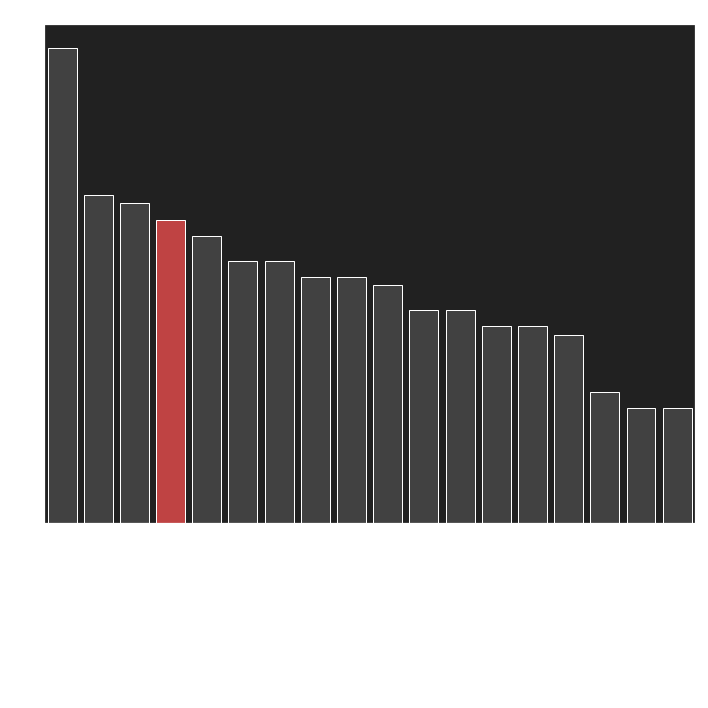

In [142]:
#1a 

stat = top6_cb_df[['Name', 'Interceptions', 'Team']]
stat = stat.sort_values(by = 'Interceptions', ascending = False).reset_index(drop = True)

#Plot
fig = plt.figure()

color = get_color(stat)
init_plot((10, 10), "212121")

ax = sns.barplot('Name', 'Interceptions',  data = stat, palette= color)

#Coloring and Styling
set_colors(ax)


stylize_plot(ax, "Player", "Interceptions", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Interceptions)")

fig.savefig('1a.jpg', facecolor = '#212121', dpi = 600)

In [143]:
#1b

stat = top6_cb_df[['Name', 'Tackles', 'Team']]
stat = stat.sort_values(by = 'Tackles', ascending = False).reset_index(drop = True)

#Plot

fig = plt.figure()

color = get_color(stat)
init_plot((10, 10), "212121")

ax = sns.barplot(stat['Name'], stat['Tackles'], palette= color)

#Coloring and Styling
set_colors(ax)

stylize_plot(ax, "Player" , "Tackles", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Tackling)")

fig.savefig('1b.jpg',  facecolor = '#212121', dpi = 600)

plt.close()

In [164]:
#1c

stat = top6_cb_df[['Name', 'Clearances', 'Team']]
stat = stat.sort_values(by = 'Clearances', ascending = False).reset_index(drop = True)

#Plot

fig = plt.figure()

color = get_color(stat)
init_plot((10, 10), "212121")


ax = sns.barplot(stat['Name'], stat['Clearances'], palette= color)

#Coloring and Styling
set_colors(ax)

stylize_plot(ax, "Player" , "Clearances", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Clearances)")

fig.savefig('1c.jpg',  facecolor = '#212121', dpi = 600)
plt.close()

In [165]:
#1d

stat = top6_cb_df[['Name', 'Dribbled past', 'Team']]
stat = stat.sort_values(by = 'Dribbled past', ascending = True).reset_index(drop = True)

#Plot

fig = plt.figure()

color = get_color(stat)
init_plot((10, 10), "212121")

ax = sns.barplot(stat['Name'], stat['Dribbled past'], palette= color)

#Coloring and Styling
set_colors(ax)

stylize_plot(ax, "Player" , "Dribbled past", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Dribbled past)")

fig.savefig('1d.jpg',  facecolor = '#212121', dpi = 600)
plt.close()

In [153]:
#2b Aerial Duels won vs %Aerial Duels won

aerial_duels = top6_cb_df[['Name', 'Aerial duels won', 'Aerial duels won %']]
aerial_duels = aerial_duels.sort_values(by = 'Aerial duels won %', ascending= True)

x = aerial_duels['Aerial duels won'].values
y = aerial_duels['Aerial duels won %'].values

names = aerial_duels['Name'].values

fig = plt.figure(facecolor='black')

config = {
    'ha': 'center', 
    'va': 'center'
}

color = '#fff59d'
for i, nm in enumerate(names):
    if i == 0:
        plt.scatter(x[i], y[i], c = '#f44336')
        plt.text(x[i], y[i] + 0.45, nm, config, color = color)
    else:
        disy = y[i] - y[i-1]
        if disy < 0.1:
            disx = x[i] - x[i-1]
            if disx > 1:
                plt.scatter(x[i], y[i], c = '#f44336')
                plt.text(x[i], y[i] - 0.45, nm, config, color = color)
        else:
            plt.scatter(x[i], y[i], c = '#f44336')
            plt.text(x[i], y[i] + 0.45, nm, config, color = color)
            
ax = fig.gca()

set_colors(ax)

ax.set_xlabel("Aerial Duels Won", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Aerial Duels Won %", rotation = 90, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Harry Maguire vs Top 6 PL CB's 2018/19 Season (Aerial Defending ability)",family = FONT_TITLE, fontsize = 13, color = 'white')

fig.savefig('2b.jpg', facecolor = '#212121', dpi = 600)
plt.close()

In [152]:
#2a Ground Duels won vs %Ground Duels won

aerial_duels = top6_cb_df[['Name', 'Ground duels won', 'Ground duels won %']]
aerial_duels = aerial_duels.sort_values(by = 'Ground duels won %', ascending= True)

x = aerial_duels['Ground duels won'].values
y = aerial_duels['Ground duels won %'].values

names = aerial_duels['Name'].values

fig = plt.figure(facecolor='black')

config = {
    'ha': 'center', 
    'va': 'center'
}

color = '#fff59d'
for i, nm in enumerate(names):
    if i == 0:
        plt.scatter(x[i], y[i], c = '#f44336')
        plt.text(x[i], y[i] + 0.45, nm, config, color = color)
    else:
        disy = y[i] - y[i-1]
        if disy < 0.1:
            disx = x[i] - x[i-1]
        #if disx > 1:
            plt.scatter(x[i], y[i], c = '#f44336')
            plt.text(x[i], y[i] + 0.45, nm, config, color = color)
        else:
            plt.scatter(x[i], y[i], c = '#f44336')
            plt.text(x[i], y[i] - 0.45, nm, config, color = color)
            
ax = fig.gca()

set_colors(ax)

ax.set_xlabel("Ground Duels Won", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Ground Duels Won %", rotation = 90, family = "Franklin Gothic Medium", fontsize = 13)


ax.set_title("Harry Maguire vs Top 6 PL CB's 2018/19 Season (Ground Defending ability)",family = FONT_TITLE, fontsize = 13, color = 'white')

fig.savefig('2a.jpg', facecolor = '#212121', dpi = 600)

plt.close()

## Passing Attributes

In [ ]:
#3. Passing Analysis

    #a. Accurate Passes in Opposition Half vs Passing %
    #b. Passing Ratio (Bar) #Likeliness to provide line breaking passes
    #c. Key Passes (Bar chart)

In [166]:
#3a

aerial_duels = top6_cb_df[['Name', 'Accurate opposition half passes', 'Accurate passes %']]
aerial_duels = aerial_duels.sort_values(by = 'Accurate passes %', ascending= True)

x = aerial_duels['Accurate opposition half passes'].values
y = aerial_duels['Accurate passes %'].values

names = aerial_duels['Name'].values

fig = plt.figure(facecolor='black')

config = {
    'ha': 'center', 
    'va': 'center'
}

color = '#fff59d'

flip = 1
for i, nm in enumerate(names):
    if i == 0:
        plt.scatter(x[i], y[i], c = '#f44336')
        plt.text(x[i], y[i] + 0.25, nm, config, color = color)
    else:
        disy = y[i] - y[i-1]
        if disy < 0.1:
            disx = x[i] - x[i-1]
        #if disx > 1:
            plt.scatter(x[i], y[i], c = '#f44336')
            plt.text(x[i], y[i] + 0.25 * flip, nm, config, color = color)
            flip = -flip
        else:
            plt.scatter(x[i], y[i], c = '#f44336')
            plt.text(x[i], y[i] + 0.25, nm, config, color = color)
            
ax = fig.gca()

set_colors(ax)

ax.set_xlabel("Accurate passes in opposition half", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Accurate passes %", rotation = 90, family = "Franklin Gothic Medium", fontsize = 13)

ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)


ax.set_title("Harry Maguire vs Top 6 PL CB's 2018/19 Season (Passing Ability)",family = FONT_TITLE, fontsize = 13, color = 'white')
fig.savefig('3a.jpg', dpi = 600,  facecolor = '#212121')

plt.close()

In [156]:
#3b Passing Ratio

passing_data = top6_cb_df[['Name'] + COLUMNS[12:19]]
passing_data['Offensive Passing Ratio'] = top6_cb_df['Accurate opposition half passes']/top6_cb_df['Accurate own half passes']

passing_data = passing_data.sort_values(by = 'Offensive Passing Ratio', ascending= False).reset_index(drop = True)

fig = plt.figure()

color = get_color(passing_data)
init_plot((10, 10), "212121")

ax = sns.barplot(passing_data['Name'], passing_data['Offensive Passing Ratio'], palette= color)

#Coloring and Styling
set_colors(ax)

stylize_plot(ax, "Player" , "Passing ratio", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Offensive Passing Tendency)")

fig.savefig('3b.jpg', facecolor = '#212121', dpi = 600)

plt.close()

In [157]:
#3c Key Passes

passing_data = passing_data.sort_values(by = 'Key passes', ascending = False).reset_index(drop = True)


fig = plt.figure()

color = get_color(passing_data)
init_plot((10, 10), "212121")


ax = sns.barplot(passing_data['Name'], passing_data['Key passes'], palette= color)

#Coloring and Styling
set_colors(ax)

stylize_plot(ax, "Player" , "Key Passes", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Key Passes)")

fig.savefig('3c.jpg', facecolor = '#212121', dpi = 600)

plt.close()

## Misc

In [162]:
#4a Fouls Made

misc_df = top6_cb_df[['Name'] + COLUMNS[19:]]
misc_df = misc_df.sort_values(by = 'Fouls', ascending = False).reset_index(drop = True)

fig = plt.figure()

color = get_color(misc_df)
init_plot((10, 10), "212121")


ax = sns.barplot(misc_df['Name'], misc_df['Fouls'], palette= color)

#Coloring and Styling
set_colors(ax)

stylize_plot(ax, "Player" , "Fouls", "Harry Maguire vs Top 6 PL CB's 2018/19 Season (Fouls made)")

fig.savefig('4a.jpg', facecolor = '#212121', dpi = 600)

plt.close()

## Progression Analysis

In [159]:
#What traits do you want to find progress on

    #1. Total duels won 
    #2. Total duels won%
    #3. Accurate opposition half passes
    #4. Accurate Pass %
    #5. Key Passes
    #6. Yellow cards
    
    
    #5. Objectives (all stats per 90)
        #a. Accurate opposition passes vs Accurate passing % (Scatter
        #b. Duels won p90 vs Duels won %
        #c. Key passes p90

    
ATTRS = [
            'Name',
            'Total duels won',
            'Total duels won %',
            'Accurate passes %',
            'Accurate opposition half passes',
            'Key passes',
            'Yellow cards',
            'Minutes Played'
]

In [125]:
hm = pd.read_table('Harry Maguire.txt', skiprows= 0, header = None)

hm = hm.drop([0, 1], axis = 'columns')
hm.columns = ATTRS
hm['Season'] = ['2018/19', '2017/18', '2016/17']
hm['Team'] = ['Leicester', 'Leicester', 'Hull']

In [160]:
#5a

names = hm['Season'] + ' ' + hm['Team']

fig = plt.figure()

x = hm['Total duels won']/hm['Minutes Played'] * 90
y = hm['Total duels won %']

fig = plt.figure(facecolor='black')

config = {
    'ha': 'center', 
    'va': 'center'
}

color = '#fff59d'

for i, nm in enumerate(names):
    plt.scatter(x[i], y[i], c = '#f44336')
    plt.text(x[i], y[i] + 0.25, nm, config, color = color)

            
ax = fig.gca()

set_colors(ax)

ax.set_xlabel("Duels won p90", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Duels won %", rotation = 90, family = "Franklin Gothic Medium", fontsize = 13)

ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)


ax.set_title("Harry Maguire Duel winning ability Progression",family = FONT_TITLE, fontsize = 13, color = 'white')
fig.savefig('5a.jpg', dpi = 600,  facecolor = '#212121')

plt.close()

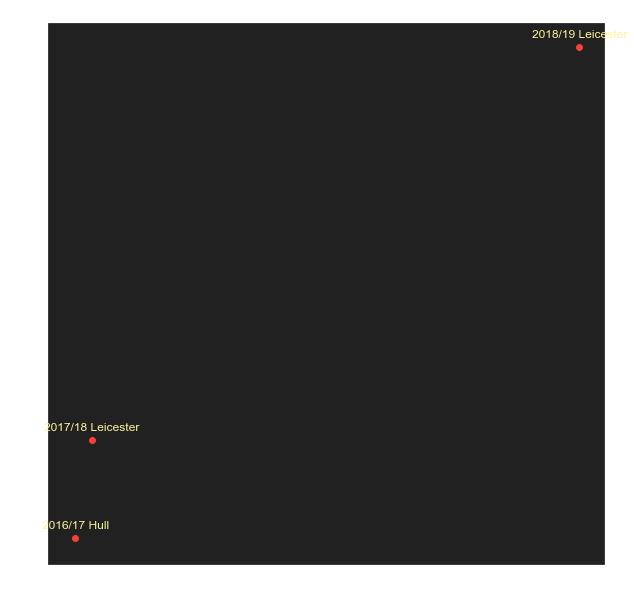

In [161]:
ames = hm['Season'] + ' ' + hm['Team']

fig = plt.figure()


x = hm['Accurate opposition half passes']/hm['Minutes Played'] * 90
y = hm['Accurate passes %']


fig = plt.figure()

config = {
    'ha': 'center', 
    'va': 'center'
}

color = '#fff59d'

for i, nm in enumerate(names):
    plt.scatter(x[i], y[i], c = '#f44336')
    plt.text(x[i], y[i] + 0.25, nm, config, color = color)

            
ax = fig.gca()

set_colors(ax)

ax.set_xlabel("Accurate opposition half passes p90", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Accurate passes %", rotation = 90, family = "Franklin Gothic Medium", fontsize = 13)

ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)


ax.set_title("Harry Maguire Passing ability Progression",family = FONT_TITLE, fontsize = 13, color = 'white')
fig.savefig('5b.jpg', dpi = 600,  facecolor = '#212121')

#plt.close()